<a href="https://colab.research.google.com/github/AhmettYilmaz/deep-learning-exercises/blob/main/diabetes_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Import the dataset
diabetes = pd.read_csv("/content/diabetes.csv")

# Show the head of the data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Let-s look at the information about datasets
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Let's look at some statistic value
diabetes.describe().T # Transpose the dataframe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


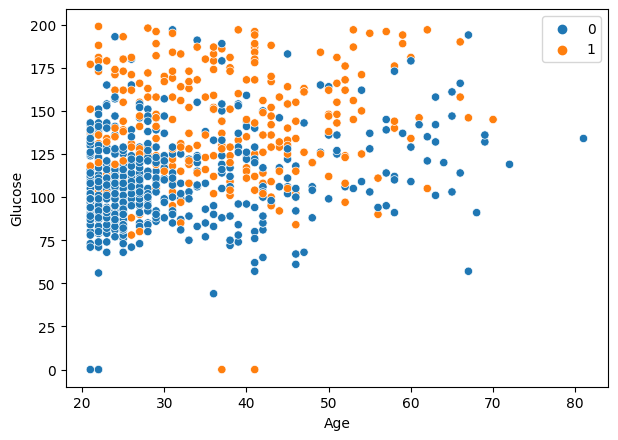

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.scatterplot(data=diabetes, x="Age", y="Glucose", hue="Outcome")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [ ]:
# Split the dataset to features and target (outcome) value
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [ ]:
# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalization 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot the predicted values.
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Create prediction
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("Our problem is multiclassification!!!")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the results
  plt.figure(figsize=(7,5), dpi=100)
  plt.contourf(xx, yy , y_pred, cmap="RdYlGn", alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap="RdYlGn", alpha=0.9)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a Classification Model
model = Sequential(name="Diabetes_Model")

# Create the layers
model.add(Dense(128, input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6714 - acc: 0.6352
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6467 - acc: 0.6531
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5831 - acc: 0.6775
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5364 - acc: 0.7150
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5467 - acc: 0.7231
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4967 - acc: 0.7443
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4663 - acc: 0.7752
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4456 - acc: 0.7932
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4613 - acc: 0.7671
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4454 - acc: 0.7850
Epoch 11/100
20/20 [==============================] - 0s 4m

In [ ]:
# Check the accuracy our model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set {loss}")
print(f"Model accuracy on the test set % {(accuracy*100):.2f}")

5/5 [==============================] - 0s 6ms/step - loss: 1.0947 - acc: 0.7403
Model loss on the test set 1.0946500301361084
Model accuracy on the test set % 74.03


# How about the confusion matrix??

\begin{bmatrix}
True Positive & False Positive\\
False Negative & True Negative
\end{bmatrix}

**True Positive:** model predicted **1** when actual is **1**\
**True Negative:** model predicted **0** when actual is **0**\
**False Positive:** model predicted **1** when actual is **0**\
**False Negative:** model predicted **0** when actual is **1**



In [ ]:
y_pred = model.predict(X_test)
y_pred = tf.round(y_pred)

5/5 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[83, 16],
       [24, 31]])

## How to look more prettier ?

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float32")/ cm.sum(axis=1)[:,np.newaxis]


(2, 2)

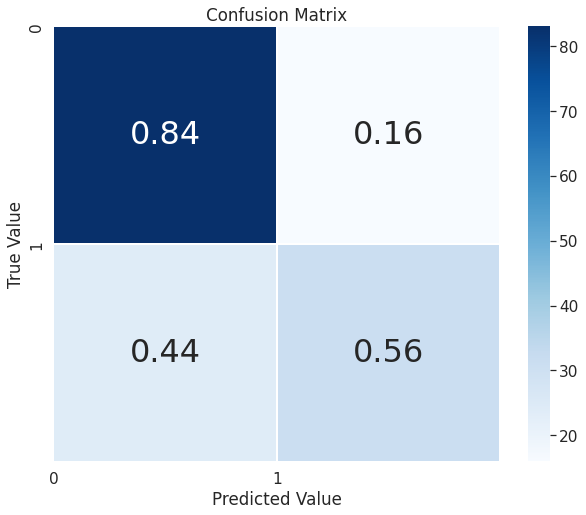

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=cm_norm, annot_kws={"size": 32}, linewidth=0.5, cmap="Blues") # font size
ax.set(title="Confusion Matrix",
       xlabel="Predicted Value",
       ylabel="True Value",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes))
plt.show()